<a href="https://colab.research.google.com/github/adbioc/Spectroscopy/blob/main/AAGYCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [22]:
os.chdir("/content/drive/My Drive/Raja_CD/AAGY/")
!ls *.xlsx

'AAGY_Function of temperature.xlsx'  'ABGY_Function of temperature.xlsx'


In [23]:
dfT1=pd.read_excel('AAGY_Function of temperature.xlsx')
dfT2=pd.read_excel('ABGY_Function of temperature.xlsx')




In [35]:
def findT(df):
  T=[]
  TTCD=df
  ll=list(TTCD.columns.values)
  ll.remove(ll[0])
  return np.array(ll)


In [36]:
def numbers(s):
  # 20C=>20
  S=[]
  for i in s:
    S.append(int(re.search(r"\d+", i).group(0)))
  return(S)

In [37]:
def fnd_indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]
x=[-10,2,30,15,41]
nds = fnd_indices(x,lambda x:x>=30)
nds

[2, 4]

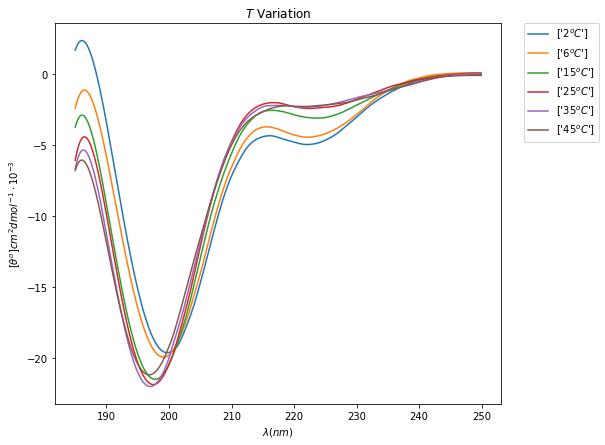

In [38]:
def readCDT(df):
  
  T=findT(df)
  T=numbers(T)
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
    plt.plot(lam,X[:,i],label= [str(T[i])+'$^oC$'])
    plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
    plt.xlabel(r'$\lambda (nm)$')
    plt.title(r'$T$ Variation')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
  return T,lam,X 
T,lam,X =readCDT(dfT1)

def ratio_plots_old(TT,X,lam):
  # T  and X are obtained from function readcdT
  # Given X the function plots the ratio 
  # of 222:206 and 192:206 
  l_222=np.where(lam==222)[0]
  l_206=np.where(lam==206)[0]
  l_192=np.where(lam==192)[0]
  rat1=X[l_222[0],:]/X[l_206[0],:]
  rat2=X[l_192[0],:]/X[l_206[0],:]
  fig,ax =  plt.subplots(2,2,figsize=(10,8))

  #fig, (ax1, ax2,ax3,ax4) = plt.subplots(2, 2, figsize=(6,4))
  #plt.subplots_adjust(wspace=0.3, hspace=0.2)
  # ax[0][0].set_title("222:206")
  # ax[0][1].set_title("222:206")
  # ax[1][0].set_title("Ratio(R) Plots")
  # ax[1][1].set_title("Inv R Plots")



  ax[0][0].plot(TT,rat1,'bo-')
  ax[0][1].plot(TT,rat2,'co-')
  ax[1][0].plot(rat1,rat2,'ro-')
  ax[1][1].plot(1./rat1,1/rat2,'go-')
  ax[0][0].set(xlabel='T$^o$C', ylabel='R1')
  ax[0][1].set(xlabel='T$^o$C', ylabel='R2')
  ax[1][0].set(xlabel='R1', ylabel='R2')
  ax[1][1].set(xlabel='1/R1', ylabel='1/R2')

  return rat1,rat2





(array([0.37827558, 0.35819303, 0.27171867, 0.23294331, 0.22799433,
        0.22657376]),
 array([0.64301623, 0.83813032, 1.26417055, 1.43805725, 1.57698686,
        1.61691526]))

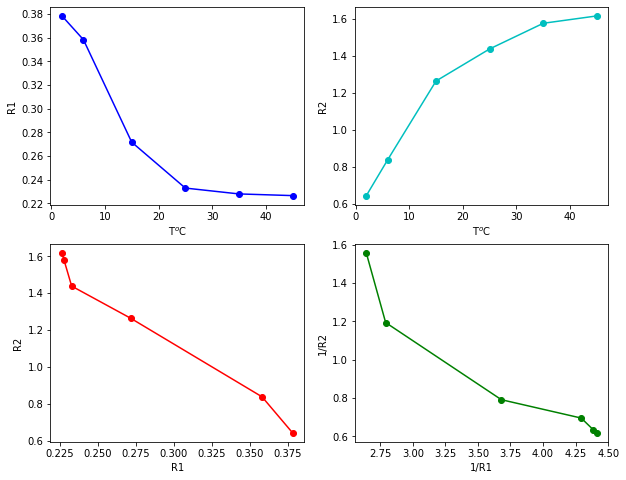

In [39]:
ratio_plots_old(T,X,lam)

## Now Let us divide the tempeerature range < & >= 15C

In [40]:
def readCDT_gt_crit(df,Tcrit):
  T=findT(df)
  T=np.array(numbers(T))
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  ik=fnd_indices(T,lambda T:T>Tcrit)
  for i in range(c):
    if T[i]> Tcrit:
      plt.plot(lam,X[:,i],label= [str(T[i])+'$^oC$'])
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(r'$T$ Variation')
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T[T>Tcrit],lam,X[:,ik]


def readCDT_le_crit(df,Tcrit):
  T=findT(df)
  T=np.array(numbers(T))
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  ik=fnd_indices(T,lambda T:T<=Tcrit)
  for i in range(c):
    if T[i]<= Tcrit:
      plt.plot(lam,X[:,i],label= [str(T[i])+'$^oC$'])
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(r'$T$ Variation')
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T[T<=Tcrit],lam,X[:,ik]


                   


In [41]:
# the greater than and less than should have selective X entries 

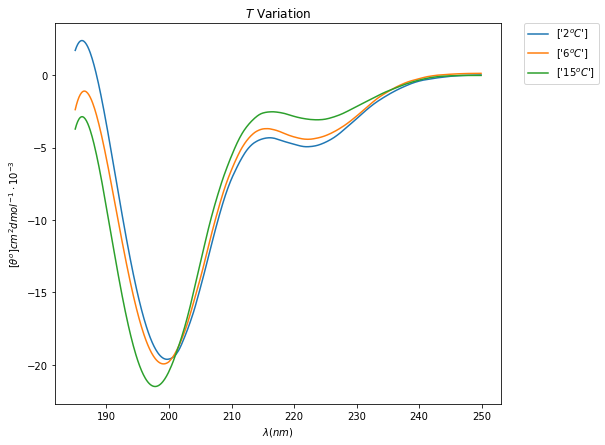

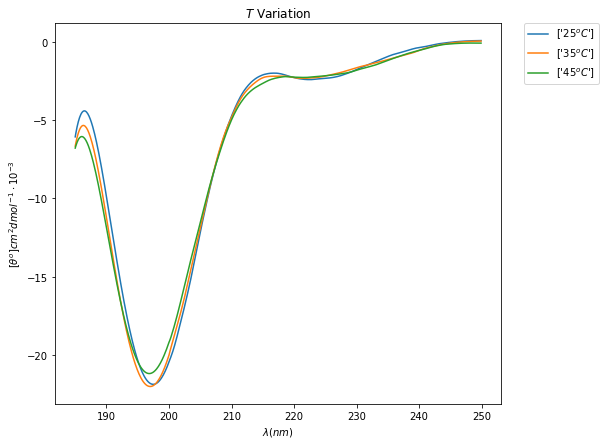

In [42]:
T11,lam11,X11=readCDT_le_crit(dfT1,15.0)

T12,lam12,X12=readCDT_gt_crit(dfT1,15.0)







In [43]:
def ratio_plots_new(TT,X,lam):
  TT=TT+273 # Assume TT is provided in K
  l_222=np.where( (lam-221.9)*(lam-222.1)<0)[0]
  l_206=np.where((lam-205.9)*(lam-206.1)<0)[0]
  l_192=np.where((lam-191.9)*(lam-192.1)<0)[0]
  rat1=X[l_222[0],:]/X[l_206[0],:]
  rat2=X[l_206[0],:]/X[l_192[0],:]

  # We define R1 and R2 as theta(222):theta(206) and theta(206):theta(192)
  fig,ax =  plt.subplots(3,2,figsize=(14,10))

  ax[0][0].plot(TT,rat1,'bo-')
  ax[0][1].plot(TT,rat2,'co-')
  ax[1][0].plot(1/TT,np.log(abs(rat1)),'ro-')
  ax[1][1].plot(1/TT,np.log(abs(rat2)),'go-')
  ax[2][0].plot(rat1,rat2,'gs-')
  ax[2][1].plot(np.log(rat1),np.log(rat2),'ks-')

  ax[0][0].set(xlabel='T$^o$K', ylabel='R1')
  ax[0][1].set(xlabel='T$^o$K', ylabel='R2')
  ax[1][0].set(xlabel='1/T$^o$K', ylabel='log R1')
  ax[1][1].set(xlabel='1/T$^o$K', ylabel='log R2')

  ax[2][0].set(xlabel='R1', ylabel='R2')
  ax[2][1].set(xlabel='1/T$^o$K', ylabel='log R2')

  return rat1,rat2
  



(array([0.37827558, 0.35819303, 0.27171867]),
 array([1.55517069, 1.19313188, 0.79103251]))

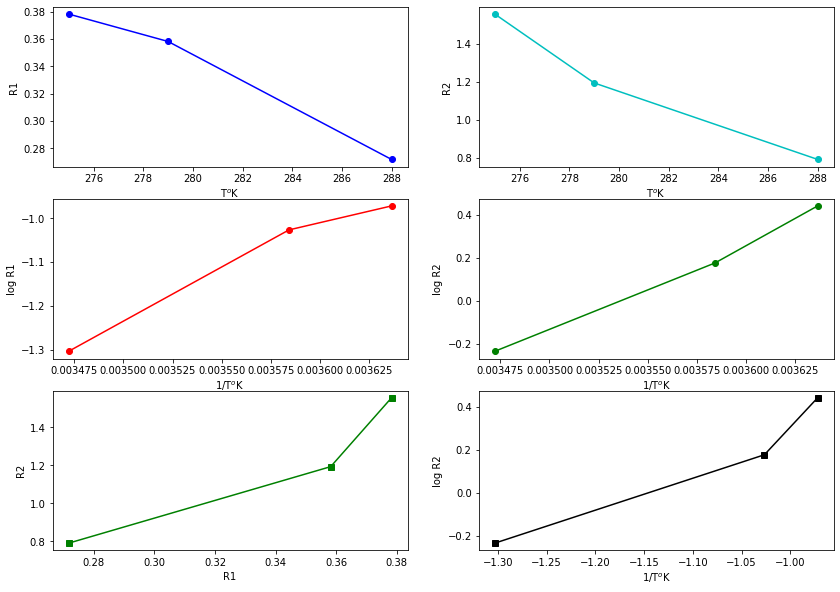

In [44]:
ratio_plots_new(T11,X11,lam11)


(array([0.23294331, 0.22799433, 0.22657376]),
 array([0.69538261, 0.63412069, 0.6184616 ]))

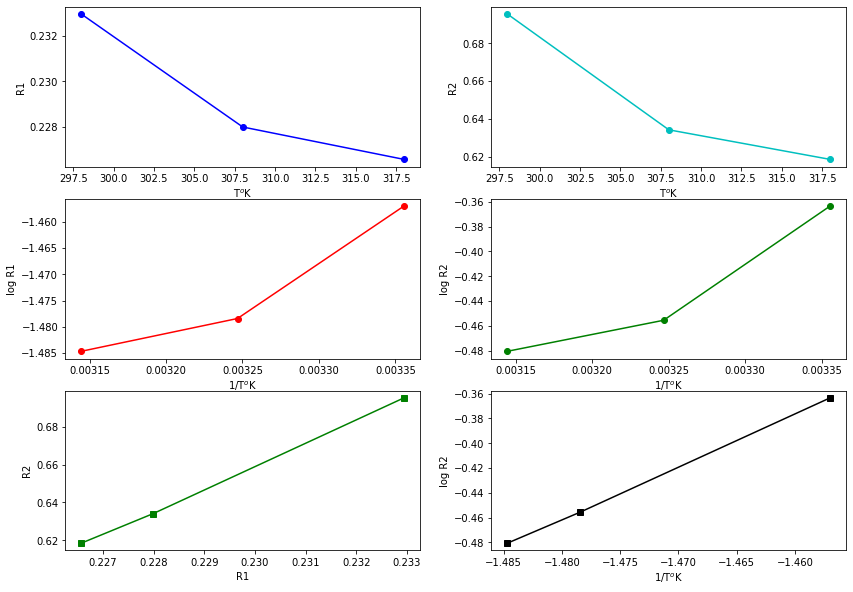

In [45]:
# Ratio plot error 
#ratio_plots_new(T11,X11,lam11)

ratio_plots_new(T12,X12,lam12)

